In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import joblib


In [81]:
df=pd.read_csv(r"C:\Users\Poornashree\Downloads\temperature.csv")
print(df.head())
dg=pd.read_csv(r"C:\Users\Poornashree\Downloads\rainfall.csv")
print(dg.head())

   YEAR  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC
0  1961   24.00    18.98    26.11    27.06    21.17
1  1962   24.04    18.91    25.91    27.14    21.47
2  1963   24.15    19.07    25.57    27.21    22.04
3  1964   24.10    18.83    26.38    26.90    21.58
4  1965   24.07    19.22    25.24    27.08    22.10
   YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL    AUG    SEP    OCT  \
0  1961  26.1  34.8  26.0  28.5  77.6  192.9  336.6  287.6  234.9  122.2   
1  1962  12.6  21.6  16.0  43.6  70.8  137.1  281.6  276.9  211.0   78.4   
2  1963   6.8   9.8  41.7  50.6  60.9  168.0  258.6  316.7  164.9   99.1   
3  1964  18.6  14.1  19.0  40.0  52.1  177.2  345.7  273.7  200.4   67.4   
4  1965  11.8  28.1  26.7  45.1  52.7  116.1  270.1  192.8  129.5   34.0   

    NOV   DEC     ANN  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
0  21.7  10.4  1399.2     60.9    132.1   1052.0    154.2  
1  18.3  29.9  1198.0     34.3    130.4    906.6    126.7  
2  28.4  15.5  1220.9     16.6    153.1    908.2   

In [82]:
print(df.info()) #understand the data
print(df.describe()) #statistics of the dataset
print(df.isnull().sum()) #finding the missing value
print(dg.info())
print(dg.describe())
print(dg.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     58 non-null     int64  
 1   ANNUAL   58 non-null     float64
 2   JAN-FEB  58 non-null     float64
 3   MAR-MAY  58 non-null     float64
 4   JUN-SEP  58 non-null     float64
 5   OCT-DEC  58 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.8 KB
None
              YEAR     ANNUAL    JAN-FEB    MAR-MAY    JUN-SEP    OCT-DEC
count    58.000000  58.000000  58.000000  58.000000  58.000000  58.000000
mean   1989.500000  24.460345  19.578448  26.338103  27.379138  22.199138
std      16.886879   0.367333   0.771910   0.709651   0.375548   0.604519
min    1961.000000  23.740000  18.250000  25.240000  26.570000  21.170000
25%    1975.250000  24.150000  19.075000  25.865000  27.155000  21.832500
50%    1989.500000  24.440000  19.455000  26.295000  27.300000  22.140000
75%    2003.750000  2

In [83]:
#rowls and columns
print("df: ",df.shape)
print("dg: ",dg.shape)

df:  (58, 6)
dg:  (58, 18)


In [84]:
#columns
print(df.columns)
print(dg.columns)

Index(['YEAR', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC'], dtype='object')
Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANN', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'],
      dtype='object')


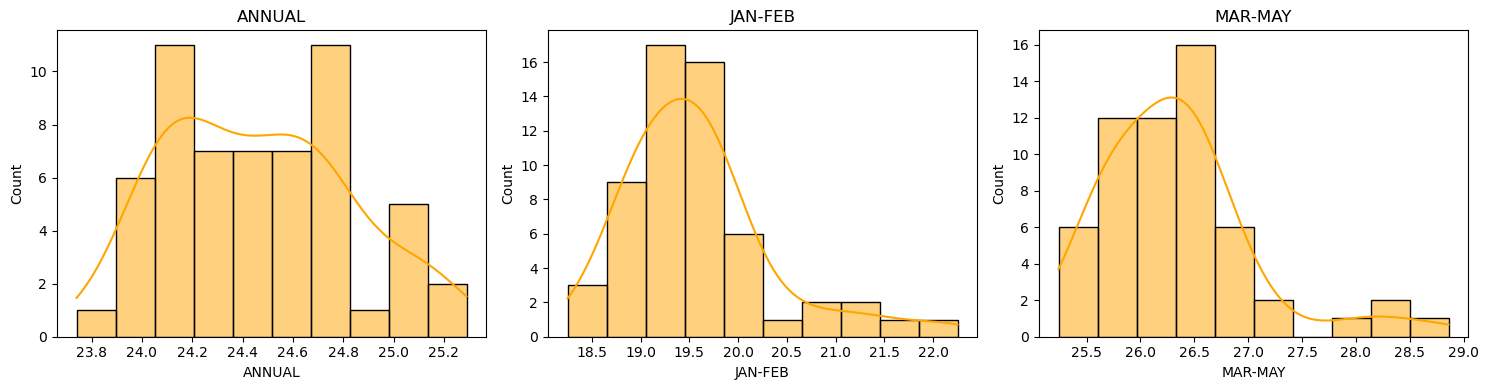

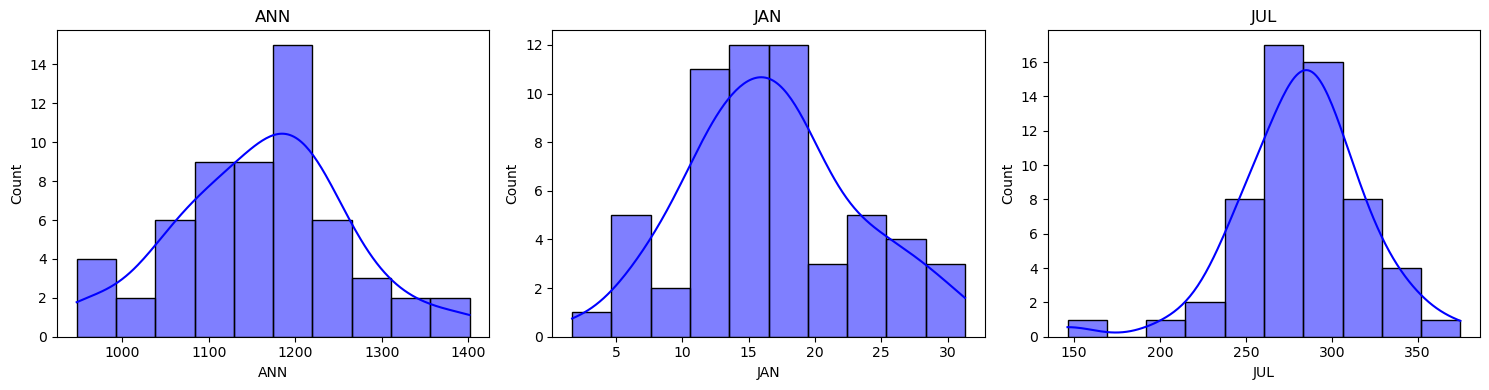

In [85]:
#Univariate analysis
num_cols = ['ANNUAL', 'JAN-FEB', 'MAR-MAY']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], kde=True, ax=ax, bins=10, color='orange')
    ax.set_title(col)

plt.tight_layout()
plt.show()
num_cols = ['ANN', 'JAN', 'JUL']  # you can add more like 'FEB', 'AUG', etc.

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, col in zip(axes, num_cols):
    sns.histplot(dg[col], kde=True, ax=ax, bins=10, color='blue')
    ax.set_title(col)

plt.tight_layout()
plt.show()

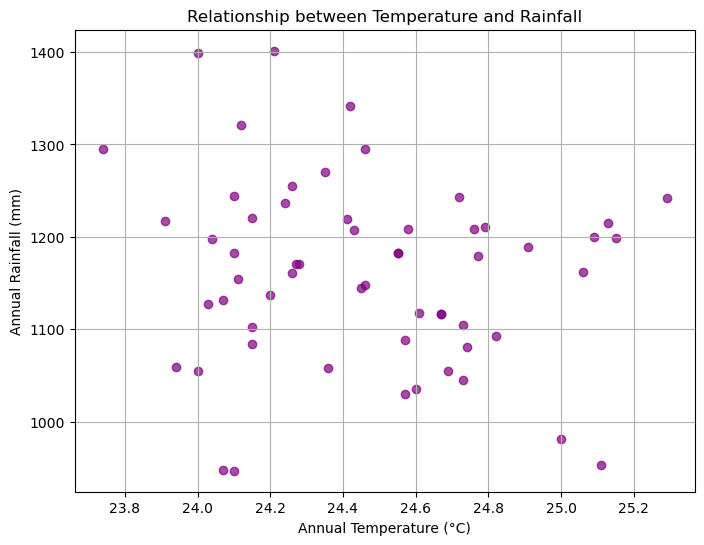

In [86]:
plt.figure(figsize=(8,6))
plt.scatter(data['Temperature (°C)'], data['Rainfall (mm)'], color='purple', alpha=0.7)

plt.xlabel("Annual Temperature (°C)")
plt.ylabel("Annual Rainfall (mm)")
plt.title("Relationship between Temperature and Rainfall")
plt.grid(True)
plt.show()


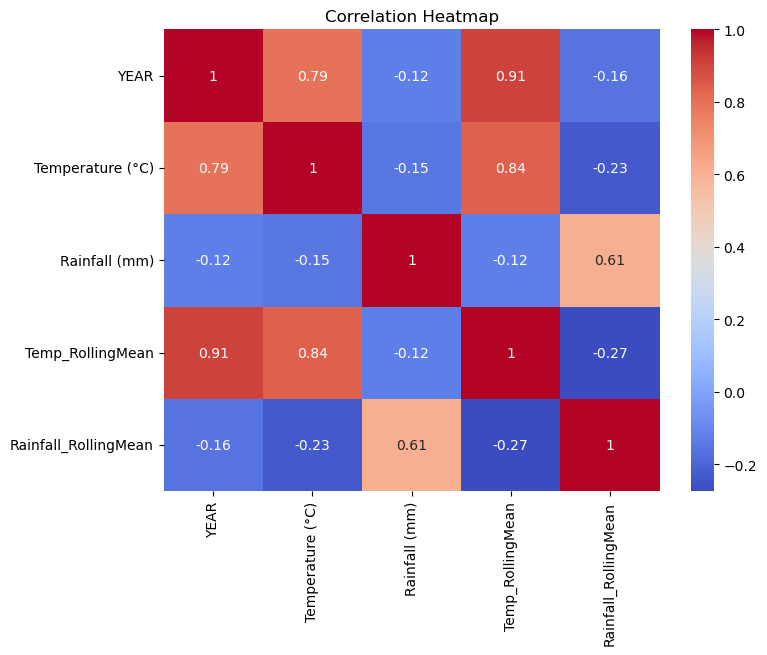

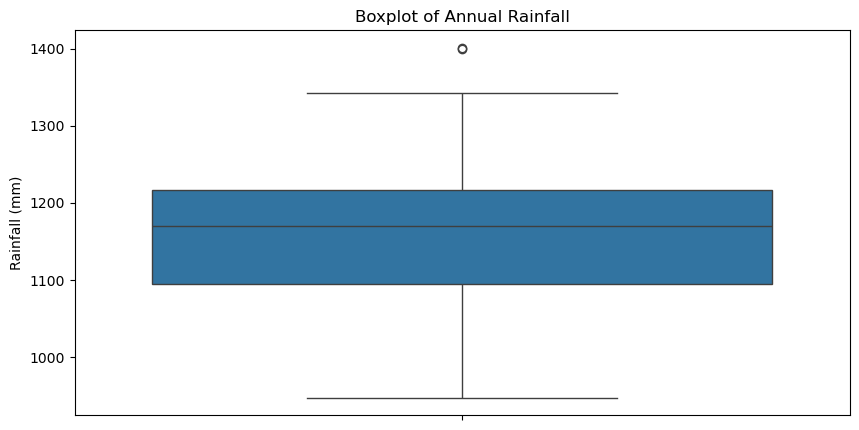

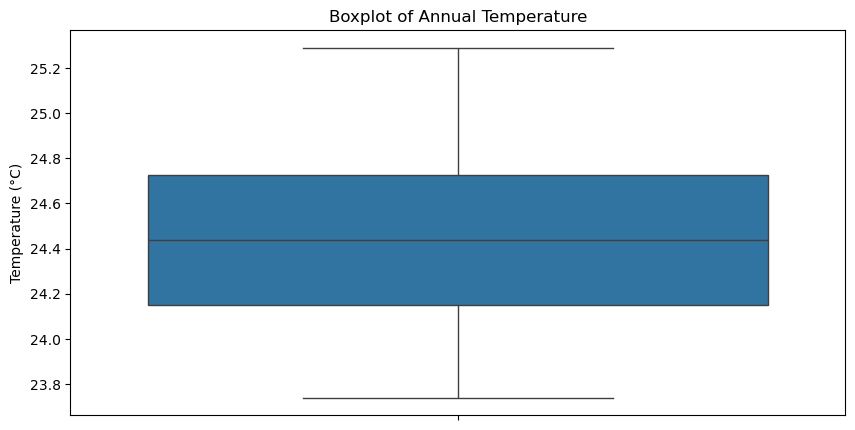

In [87]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(10,5))
sns.boxplot(data['Rainfall (mm)'])
plt.title("Boxplot of Annual Rainfall")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data['Temperature (°C)'])
plt.title("Boxplot of Annual Temperature")
plt.show()

In [88]:
data['Temp_RollingMean'] = data['Temperature (°C)'].rolling(3).mean()   # 3-year moving avg
data['Rainfall_RollingMean'] = data['Rainfall (mm)'].rolling(3).mean()

In [89]:
print(df.columns)
print(dg.columns)

Index(['YEAR', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC'], dtype='object')
Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANN', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'],
      dtype='object')


In [90]:
#data preprocessing

data = pd.merge(df[['YEAR','ANNUAL']], dg[['YEAR','ANN']], on="YEAR")
data.rename(columns={"ANNUAL":"Temperature (°C)", "ANN":"Rainfall (mm)"}, inplace=True)

X = data[['YEAR', 'Temperature (°C)']]
y = data['Rainfall (mm)']   

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
print(X_train_scaled.head())

X_train shape: (46, 2)
X_test shape: (12, 2)
       YEAR  Temperature (°C)
0  0.431211         -0.978135
1  0.123203         -0.834841
2 -1.293633          0.053579
3 -0.739219         -0.576913
4 -1.416836         -0.949476
